### Summary: visualize intresting things from space mission data since 1950

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


In [2]:
data = pd.read_csv('/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Company Analysis

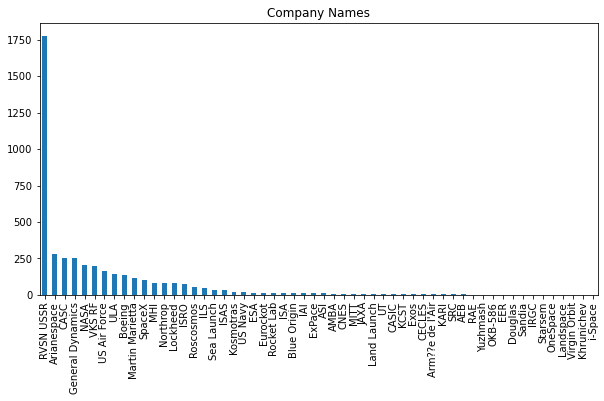

In [4]:
data['Company Name'].value_counts().plot.bar(figsize=(10,5),title='Company Names')

In [13]:
data[' Rocket'] = pd.to_numeric(data[' Rocket'],errors='coerce')

#### average cost by company

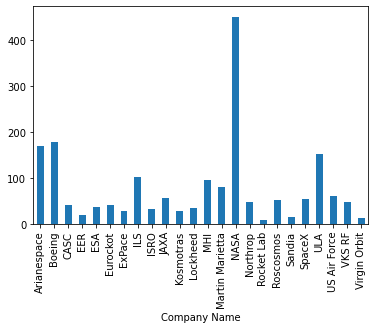

In [16]:

data.dropna().groupby(['Company Name']).mean()[' Rocket'].plot.bar()


#### Company missions by Year
will only look at the top ten companies**

In [53]:
df = data.loc[data['Company Name'].isin(data['Company Name'].value_counts()[:11].index.values)]

In [54]:
df['Datum'] = pd.to_datetime(df['Datum'],utc=True).dt.date

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df['Year'] = pd.to_datetime(df['Datum']).dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Missions by year by comapny**

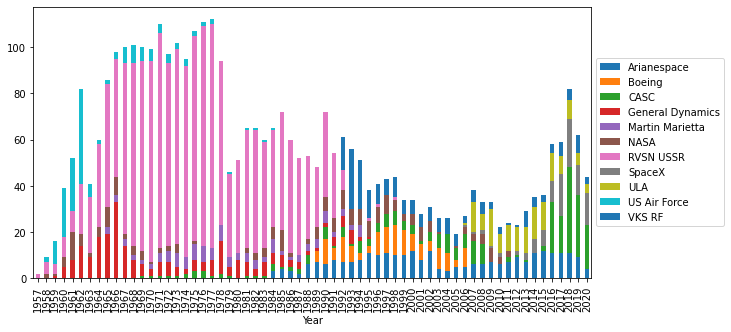

In [59]:
# only using top 11 companies because any more would make it look to messy
df2 = df.groupby(['Year','Company Name'])['Year'].count().unstack('Company Name').fillna(0)
df2[df2.columns].plot(kind='bar', stacked=True,figsize=(10,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


**Mission success by year**

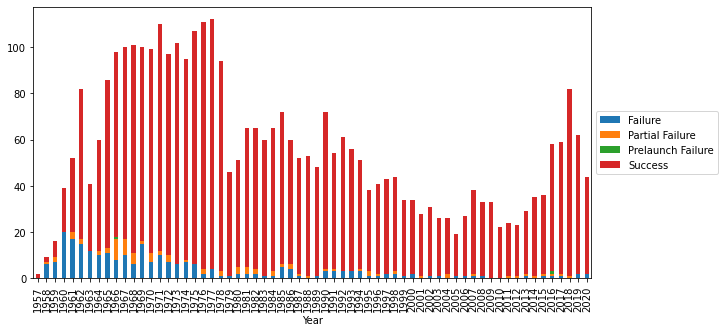

In [70]:

df2 = df.groupby(['Year','Status Mission'])['Year'].count().unstack('Status Mission').fillna(0)
df2[df2.columns].plot(kind='bar', stacked=True,figsize=(10,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


**Mission success by company**

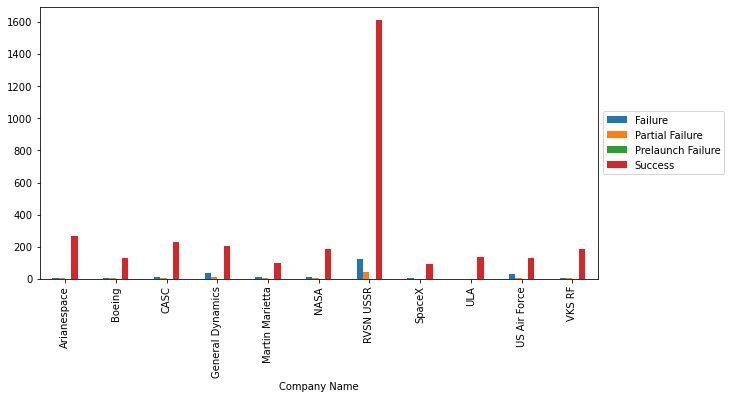

In [68]:
df2 = df.groupby(['Company Name','Status Mission'])['Company Name'].count().unstack('Status Mission').fillna(0)
df2[df2.columns].plot(kind='bar',figsize=(10,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


### Cost analysis

**average cost for mission by year**

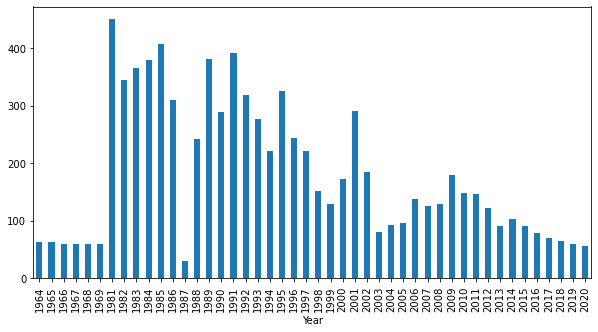

In [90]:
data.groupby(['Year']).mean()[' Rocket'].dropna().plot.bar(figsize=(10,5))

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020
...,...,...,...,...,...,...,...,...,...,...
4307,4307,4307,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA",1958-08-17,Thor-DM 18 Able I | Pioneer 0,StatusRetired,NaN,Failure,1958
4313,4313,4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958
4315,4315,4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957
